In [1]:
import random
from matplotlib import pyplot as plt
from PIL import Image
from pathlib import Path
import sys
import os
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join('..', 'src')))
from data.path import RAW_DATA, DATA_PREPROCESSED, DATA_CROPPED

### **Data Cleaning**

Let's first visualise raw data from the dataset before preprocessing.

In [34]:
def visualise_10_imgs(img_dir):
    image_files = [os.path.join(img_dir, file) for file in os.listdir(img_dir) if file.endswith('.jpg')]

    num_images_to_sample = min(len(image_files), 10)
    random_images = random.sample(image_files, num_images_to_sample)

    num_rows = 2
    num_cols = max((num_images_to_sample + num_rows - 1) // num_rows, 1)  # Ensure num_cols is at least 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))  # Adjust the figsize if needed

    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax in axes[num_images_to_sample:]:
        ax.axis('off')

    for ax, img_path in zip(axes, random_images):
        img = Image.open(img_path)
        ax.imshow(img, cmap='cividis')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

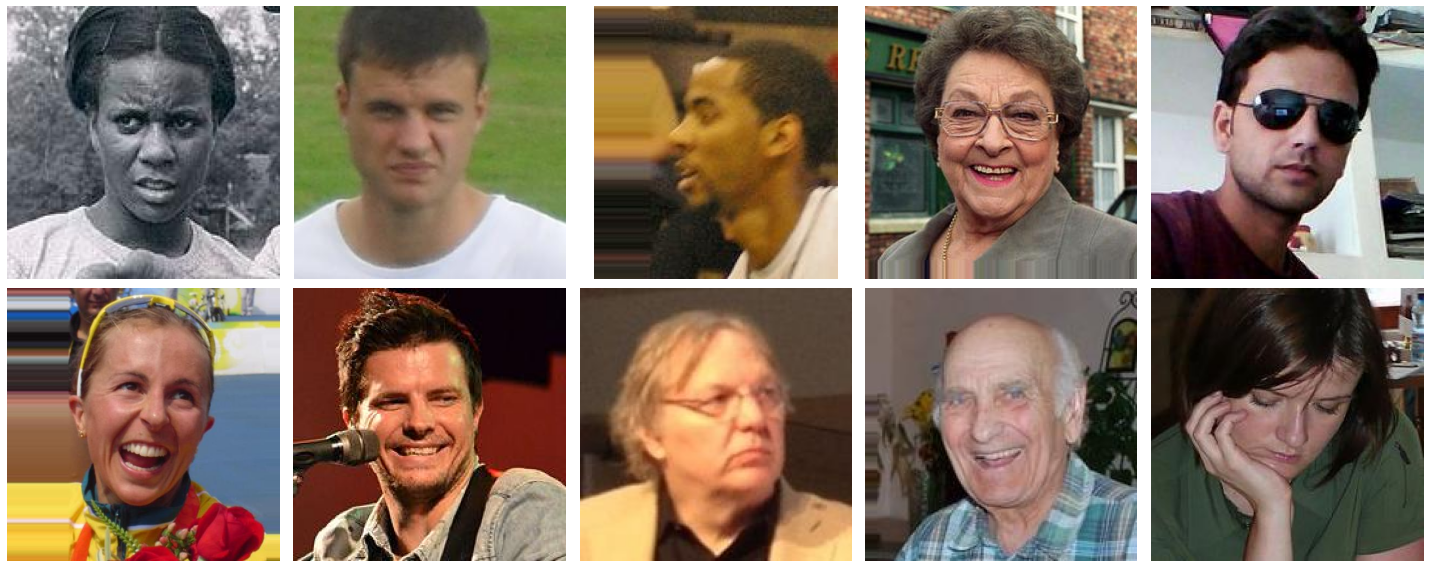

In [36]:
img_dir = RAW_DATA / '00'
visualise_10_imgs(img_dir)

These are 10 random images from the initial dataset. As we see, there are lots of different kinds of incosistent images, in particular: 

        - inapropriate pictures with no people;
        - photos with people but face is unrecognisable;
        - pictures with face positioned "in profile" instead of "anfas".

That's why data cleaning & preprocessing is necessary, where we do the following:

        - filter out images where there are no faces detected;
        - crop data so that we get as little redundant information and noise before preprocessing segmentation phase.

Let's look at what we get as a result of these procedures.

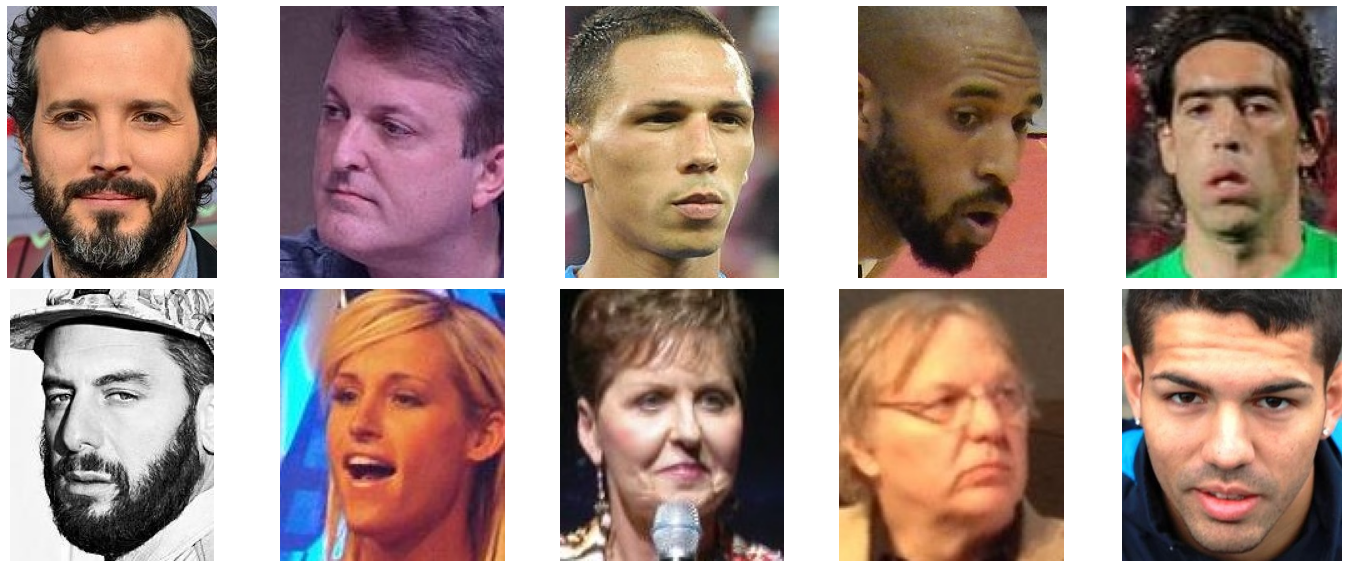

In [17]:
visualise_10_imgs(DATA_CROPPED)

### **Preprocessing & Segmentation**

Finally, we are ready to segment images and get only peoples faces. Here we also filter out pictures with "in profile" face position (note that at the previous stage we still have these). Also, we convert to grayscale so that our models can work well with this kind of data.

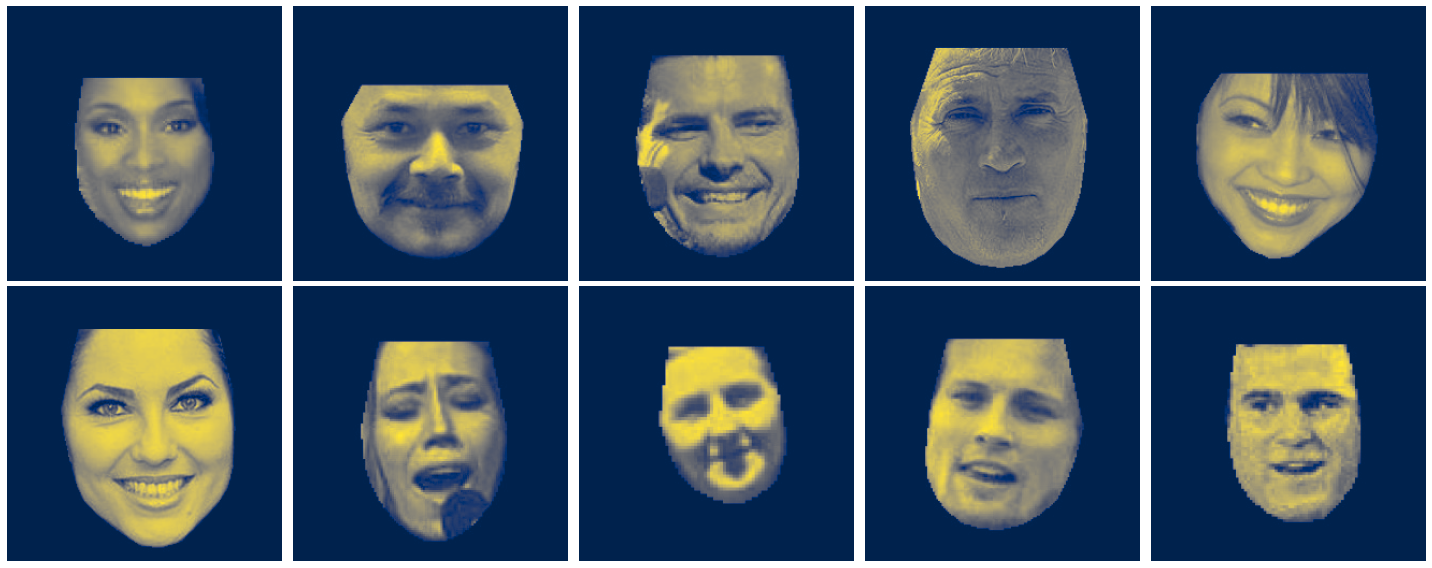

In [37]:
visualise_10_imgs(DATA_PREPROCESSED)

This concludes the stage of data cleaning and preprocessing. As a result we get around 10k segmented images.